Epoch 0/1000, Loss: 0.375620496189218
Epoch 100/1000, Loss: 0.06402624968501971
Epoch 200/1000, Loss: 0.045941565182090596
Epoch 300/1000, Loss: 0.038325949243401804
Epoch 400/1000, Loss: 0.03500672857891586
Epoch 500/1000, Loss: 0.03334728399959073
Epoch 600/1000, Loss: 0.032474916060355304
Epoch 700/1000, Loss: 0.03190809884192808
Epoch 800/1000, Loss: 0.03150840399087467
Epoch 900/1000, Loss: 0.031213677986962476


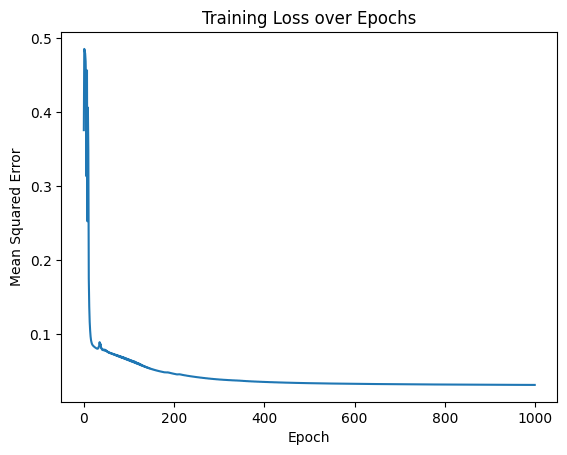

Accuracy: 0.825


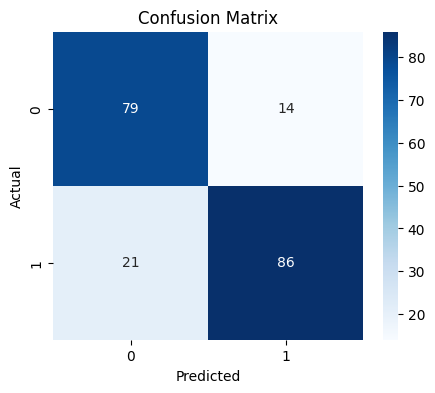

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):

        self.weights_input_hidden = np.random.rand(input_size, hidden_size)
        self.bias_input_hidden = np.random.rand(1, hidden_size)
        self.weights_hidden_output = np.random.rand(hidden_size, output_size)
        self.bias_hidden_output = np.random.rand(1, output_size)

    def forward(self, inputs):

        self.hidden_activations = sigmoid(np.dot(inputs, self.weights_input_hidden) + self.bias_input_hidden)
        self.output_activations = sigmoid(np.dot(self.hidden_activations, self.weights_hidden_output) + self.bias_hidden_output)
        return self.output_activations

    def backward(self, inputs, targets, learning_rate):



        output_error = targets - self.output_activations
        output_delta = output_error * sigmoid_derivative(self.output_activations)


        hidden_error = output_delta.dot(self.weights_hidden_output.T)
        hidden_delta = hidden_error * sigmoid_derivative(self.hidden_activations)


        self.weights_hidden_output += self.hidden_activations.T.dot(output_delta) * learning_rate
        self.bias_hidden_output += np.sum(output_delta, axis=0, keepdims=True) * learning_rate
        self.weights_input_hidden += inputs.T.dot(hidden_delta) * learning_rate
        self.bias_input_hidden += np.sum(hidden_delta, axis=0, keepdims=True) * learning_rate


X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


input_size = X_train.shape[1]
hidden_size = 5
output_size = 1
learning_rate = 0.1

nn = NeuralNetwork(input_size, hidden_size, output_size)

epochs = 1000
loss_history = []

for epoch in range(epochs):

    predictions = nn.forward(X_train)


    nn.backward(X_train, y_train.reshape(-1, 1), learning_rate)


    loss = mean_squared_error(y_train.reshape(-1, 1), predictions)
    loss_history.append(loss)

    if epoch % 100 == 0:
        print(f"Epoch {epoch}/{epochs}, Loss: {loss}")


plt.plot(loss_history)
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('Training Loss over Epochs')
plt.show()

predictions = nn.forward(X_test)

predictions_binary = (predictions > 0.5).astype(int)

accuracy = accuracy_score(y_test, predictions_binary)
print(f"Accuracy: {accuracy}")
cm = confusion_matrix(y_test, predictions_binary)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [3]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy' ,
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)
model.evaluate(x_test, y_test)

Epoch 1/10
1875/1875 [==============================] - 13s 6ms/step - loss: 0.3000 - accuracy: 0.9127
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1438 - accuracy: 0.9571
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1072 - accuracy: 0.9679
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0901 - accuracy: 0.9720
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0760 - accuracy: 0.9764
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0645 - accuracy: 0.9793
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0580 - accuracy: 0.9812
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0526 - accuracy: 0.9825
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0481 - accuracy: 0.9843
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.069

[0.06912986934185028, 0.9803000092506409]

In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

df=pd.read_csv("breast-cancer.csv")


In [6]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

In [7]:
x=df.drop(['diagnosis','id'],axis=1)
y=df['diagnosis']

In [8]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

In [12]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = Sequential()
model.add(Dense(units=128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.2)

y_pred = model.predict(X_test)
y_pred_binary = np.round(y_pred).flatten()

accuracy = accuracy_score(y_test, y_pred_binary)
print(f'Test Accuracy: {accuracy}')


Epoch 1/15
12/12 [==============================] - 1s 24ms/step - loss: 11.2167 - accuracy: 0.5604 - val_loss: 2.5058 - val_accuracy: 0.3736
Epoch 2/15
12/12 [==============================] - 0s 5ms/step - loss: 2.0889 - accuracy: 0.5769 - val_loss: 0.4581 - val_accuracy: 0.8022
Epoch 3/15
12/12 [==============================] - 0s 8ms/step - loss: 0.8879 - accuracy: 0.7170 - val_loss: 0.3943 - val_accuracy: 0.8462
Epoch 4/15
12/12 [==============================] - 0s 7ms/step - loss: 0.6020 - accuracy: 0.8077 - val_loss: 0.6650 - val_accuracy: 0.8462
Epoch 5/15
12/12 [==============================] - 0s 7ms/step - loss: 0.5876 - accuracy: 0.8077 - val_loss: 0.4075 - val_accuracy: 0.8791
Epoch 6/15
12/12 [==============================] - 0s 5ms/step - loss: 0.2922 - accuracy: 0.8901 - val_loss: 0.3346 - val_accuracy: 0.9011
Epoch 7/15
12/12 [==============================] - 0s 6ms/step - loss: 0.2515 - accuracy: 0.9038 - val_loss: 0.3527 - val_accuracy: 0.8901
Epoch 8/15
12/12 [